importing libraries


In [ ]:
import pandas as pd
import numpy as np

uploading dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Steel_industry_data.csv to Steel_industry_data.csv


loading dataset


In [ ]:
data=pd.read_csv('Steel_industry_data.csv')
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


finding null values

In [ ]:
data.isnull().sum()

,0
date,0
Usage_kWh,0
Lagging_Current_Reactive.Power_kVarh,0
Leading_Current_Reactive_Power_kVarh,0
CO2(tCO2),0
Lagging_Current_Power_Factor,0
Leading_Current_Power_Factor,0
NSM,0
WeekStatus,0
Day_of_week,0


checking datatype

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

removing column date

In [ ]:
X=data.drop(['date'], axis=1)
X.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
X.shape

(35040, 10)

checking uniques values

In [ ]:
for i in range(X.shape[1]):
  print(X.iloc[:,i].unique())
  print(X.iloc[:,i].value_counts())
  print()

[ 3.17  4.    3.24 ... 21.89 17.82 45.  ]
Usage_kWh
3.06      631
2.95      609
2.92      598
3.02      560
2.88      556
         ... 
130.21      1
19.33       1
23.83       1
12.78       1
45.00       1
Name: count, Length: 3343, dtype: int64

[ 2.95  4.46  3.28 ... 69.77 74.56 70.67]
Lagging_Current_Reactive.Power_kVarh
0.00     7194
4.46      208
4.82      203
4.68      202
4.75      202
         ... 
79.78       1
69.05       1
67.86       1
65.81       1
70.67       1
Name: count, Length: 1954, dtype: int64

[ 0.    0.18 15.66 16.96 21.28 19.22 16.88 22.32 18.   16.92 23.4   5.65
  4.82  6.7   4.57 12.89 23.15 16.67 16.63 23.33 16.74 16.99 18.25 22.1
 16.7  19.33 21.35 16.81 20.45 20.77 21.64 19.19 23.51 17.39 17.35  8.96
  5.47 16.24 22.57 20.74 20.88 22.54 19.55 17.42 24.26 17.75 25.2  17.5
 10.08  0.07  0.11  0.94  1.15  0.54  0.14 18.9  25.92 25.34 25.49  6.52
  1.04  0.5   1.58  0.43  1.37  0.47  3.96 12.13 23.22 25.16 26.5  26.42
 26.46 15.44  0.04 26.21 25.56 25.74  6.08 

In [ ]:
X['WeekStatus']=X['WeekStatus'].replace({'Weekday':0,'Weekend':1})
print(X['WeekStatus'])

0        0
1        0
2        0
3        0
4        0
        ..
35035    0
35036    0
35037    0
35038    0
35039    0
Name: WeekStatus, Length: 35040, dtype: int64


In [ ]:
data1=X.iloc[:,:8]
data1.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0


In [ ]:
data2=X.iloc[:,8:]
data3=pd.get_dummies(data2)
data3=data3.astype(int)
data3.head()

,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Day_of_week_Friday      35040 non-null  int64
 1   Day_of_week_Monday      35040 non-null  int64
 2   Day_of_week_Saturday    35040 non-null  int64
 3   Day_of_week_Sunday      35040 non-null  int64
 4   Day_of_week_Thursday    35040 non-null  int64
 5   Day_of_week_Tuesday     35040 non-null  int64
 6   Day_of_week_Wednesday   35040 non-null  int64
 7   Load_Type_Light_Load    35040 non-null  int64
 8   Load_Type_Maximum_Load  35040 non-null  int64
 9   Load_Type_Medium_Load   35040 non-null  int64
dtypes: int64(10)
memory usage: 2.7 MB


In [ ]:
df=pd.concat([data1,data3],axis=1)
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,0,1,0,0,0,0,0,1,0,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,0,1,0,0,0,0,0,1,0,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,0,1,0,0,0,0,0,1,0,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,0,1,0,0,0,0,0,1,0,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  int64  
 8   Day_of_week_Friday                    35040 non-null  int64  
 9   Day_of_week_Monday                    35040 non-null  int64  
 10  Day_of_week_Saturday                  35040 non-null  int64  
 11  Day_of_week_Sun

In [ ]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000,0.284932,0.142466,0.145205,0.142466,0.142466,0.142466,0.142466,0.142466,0.515753,0.207534,0.276712
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317,0.451388,0.349532,0.352313,0.349532,0.349532,0.349532,0.349532,0.349532,0.499759,0.405547,0.447379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.rename(columns={'Usage_kWh':'Usage','Lagging_Current_Reactive.Power_kVarh':'LaRP','Leading_Current_Reactive_Power_kVarh':'LeRP','CO2(tCO2)':'CO2','Lagging_Current_Power_Factor':'LaPF','Leading_Current_Power_Factor':'LePF','Day_of_week_Friday':'Fr','Day_of_week_Monday':'Mo','Day_of_week_Saturday':'Sa','Day_of_week_Sunday':'Su','Day_of_week_Thursday':'Th','Day_of_week_Tuesday':'Tu','Day_of_week_Wednesday':'We','Load_Type_Light_Load':'LL','Load_Type_Maximum_Load':'MaxL','Load_Type_Medium_Load':'MinL'}, inplace=True)
df.head()

,Usage,LaRP,LeRP,CO2,LaPF,LePF,NSM,WeekStatus,Fr,Mo,Sa,Su,Th,Tu,We,LL,MaxL,MinL
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,0,1,0,0,0,0,0,1,0,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,0,1,0,0,0,0,0,1,0,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,0,1,0,0,0,0,0,1,0,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,0,1,0,0,0,0,0,1,0,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
df1=df.drop(['Fr','Sa','Su','Mo','Tu','We','Th'],axis=1)
df1.head()

,Usage,LaRP,LeRP,CO2,LaPF,LePF,NSM,WeekStatus,LL,MaxL,MinL
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

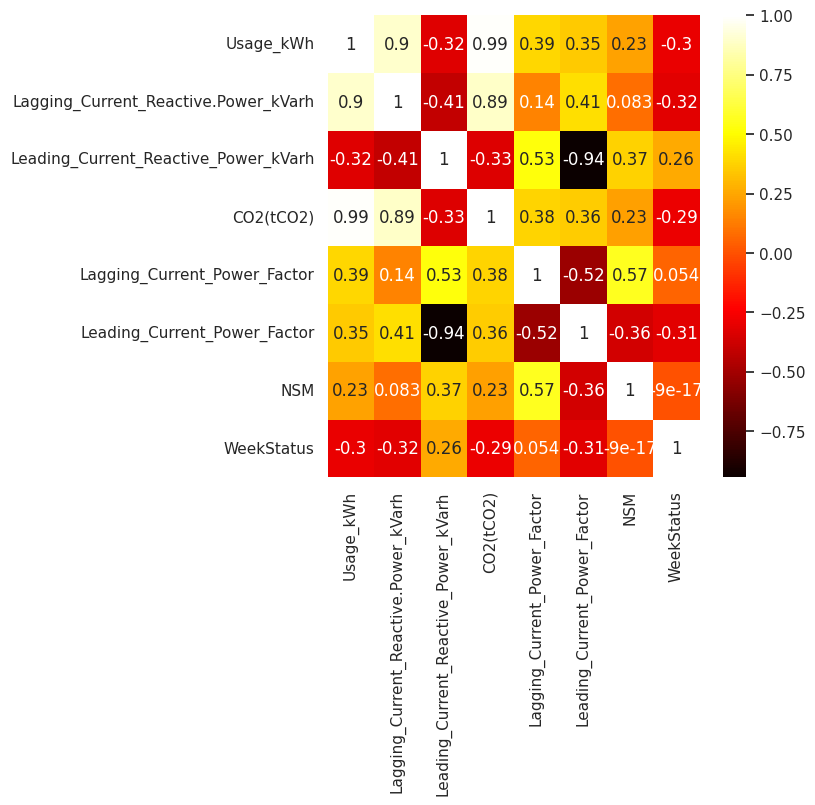

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
heatmap=sns.heatmap(data1.corr(),cmap='hot',annot=True)
heatmap

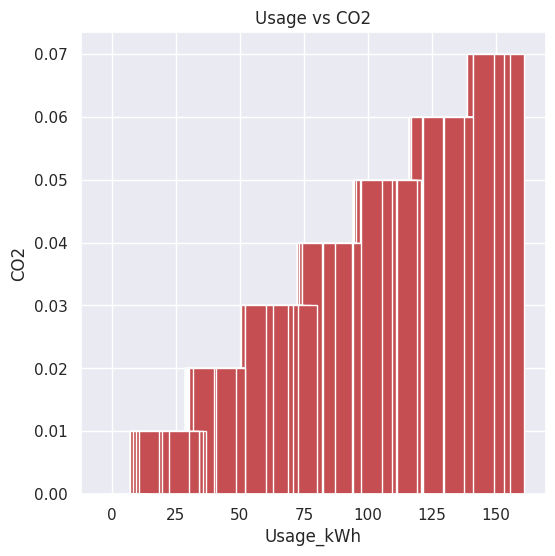

In [ ]:
plt.bar(df['Usage'],df['CO2'],color='r',width=8)
plt.xlabel('Usage_kWh')
plt.ylabel('CO2')
plt.title('Usage vs CO2')
plt.show()

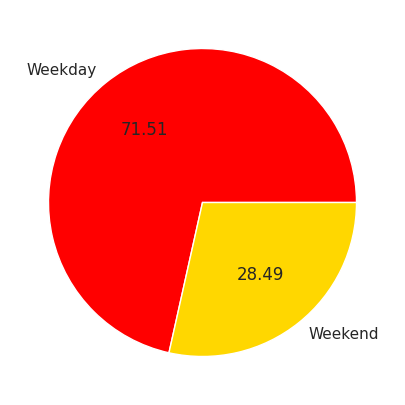

In [ ]:
sns.set(rc={'figure.figsize':(8,5)})
colors=['red','gold']
plt.pie(df['WeekStatus'].value_counts(),labels=['Weekday','Weekend'],autopct=lambda x:np.round(x,2),colors=colors)
plt.show()

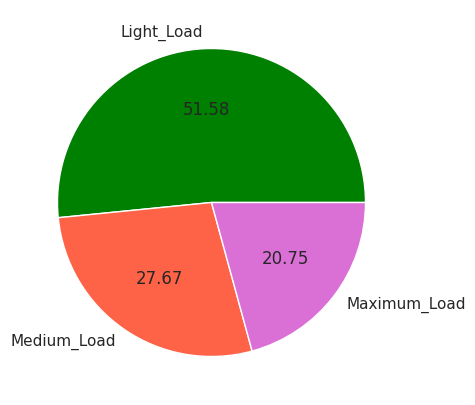

In [ ]:
plt.pie(data['Load_Type'].value_counts(),labels=['Light_Load','Medium_Load','Maximum_Load'],autopct=lambda x:np.round(x,2),colors=['green','tomato','orchid'])
plt.show()

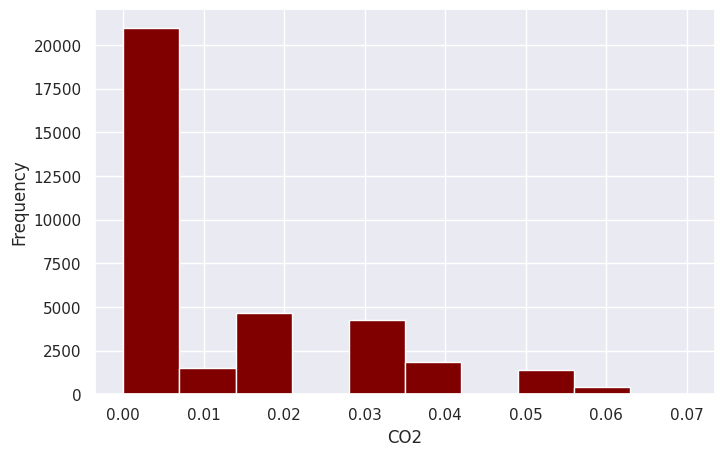

In [ ]:
plt.hist(df['CO2'],color='maroon',bins=10)
plt.xlabel('CO2')
plt.ylabel('Frequency')
plt.show()

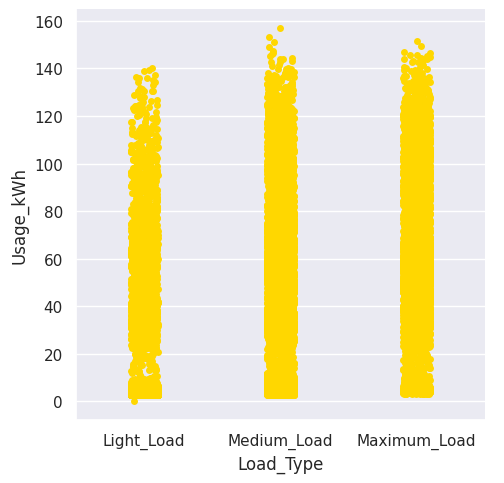

In [ ]:
catplot=sns.catplot(x='Load_Type',y='Usage_kWh',data=data,color='gold')
catplot.set_ylabels('Usage_kWh')
catplot.set_xlabels('Load_Type')
catplot

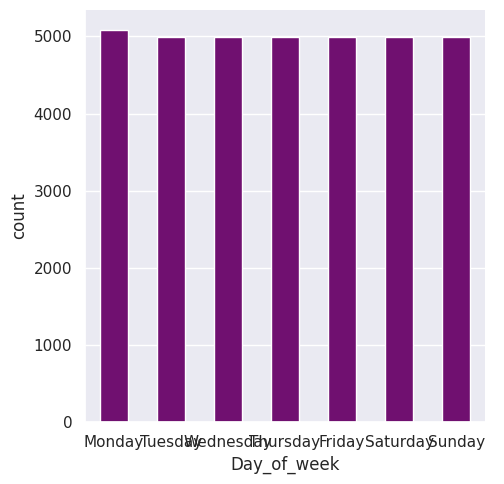

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
catplot=sns.catplot(x='Day_of_week',data=data,kind='count',width=0.5,color='purple')
catplot.set_xlabels('Day_of_week')
catplot

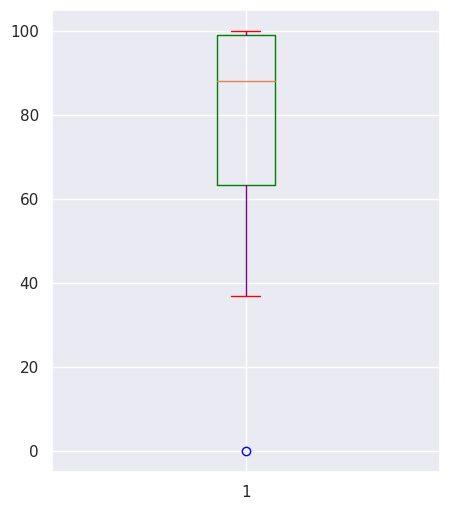

In [ ]:
sns.set(rc={'figure.figsize':(5,6)})
plt.boxplot(df.iloc[:,4],boxprops=dict(color='green'),capprops=dict(color='red'),whiskerprops=dict(color='purple'), flierprops=dict(markeredgecolor='blue'))
plt.show()

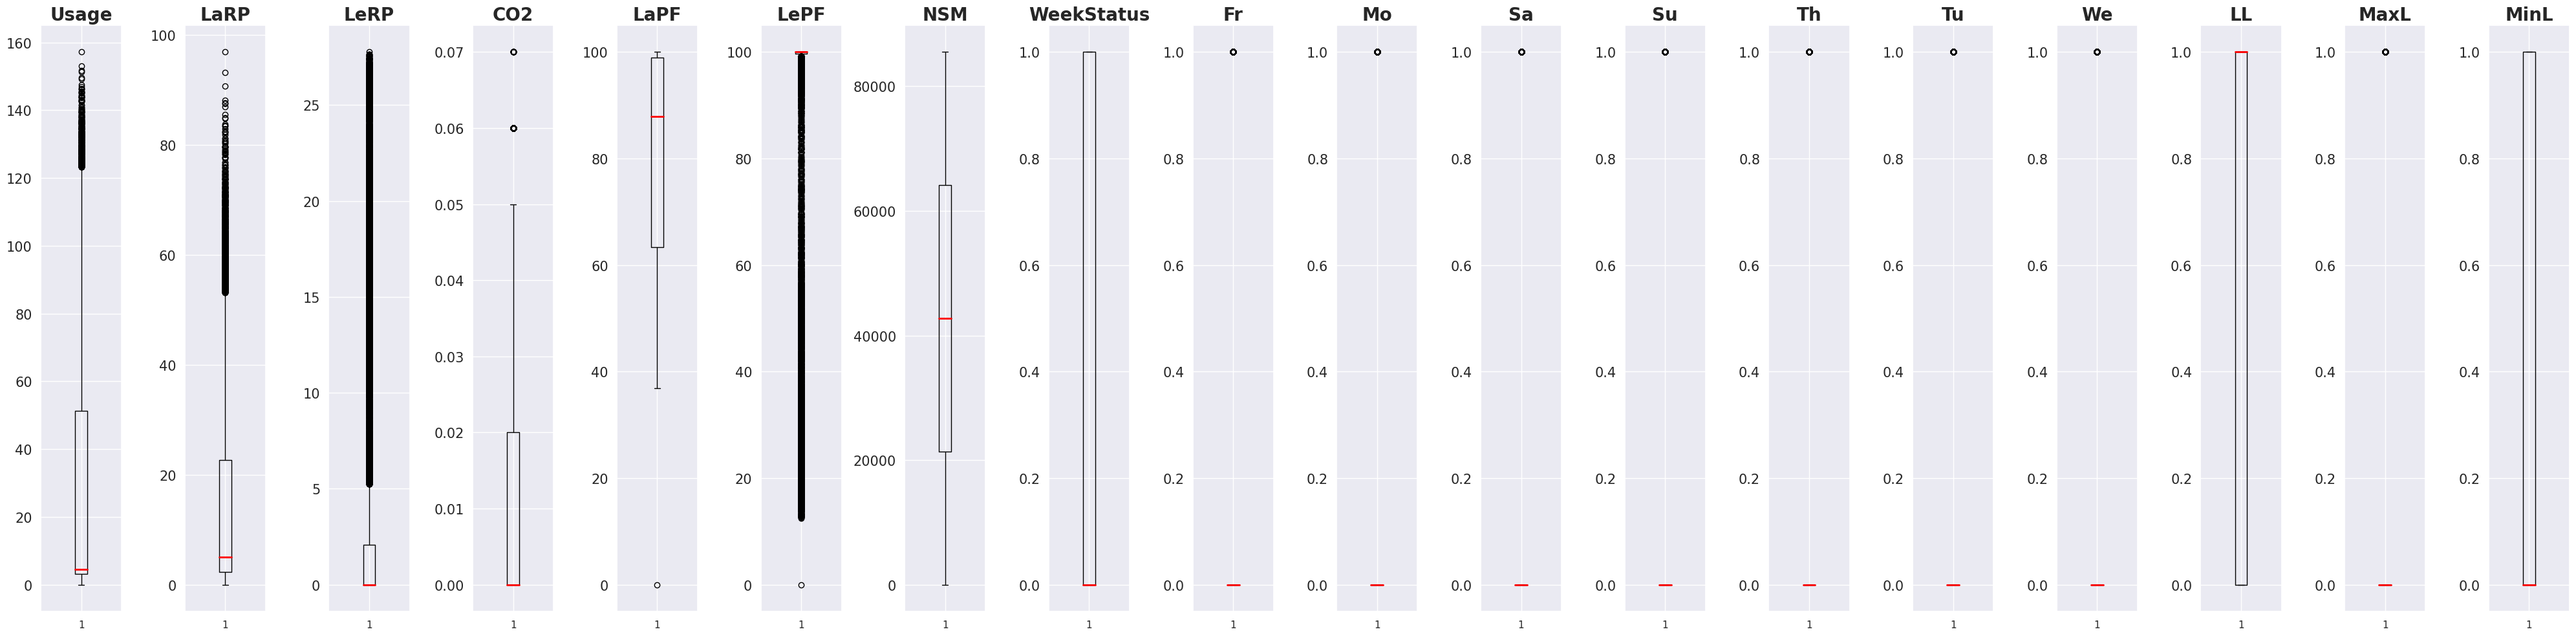

In [ ]:
fig, axs=plt.subplots(1, len(df.columns),figsize=(40,10))
for i, ax in enumerate(axs.flat):
  ax.boxplot(df.iloc[:,i],medianprops=dict(color='red',linewidth=2))
  ax.set_title(df.columns[i],fontsize=20,fontweight='bold')
  ax.tick_params(axis='y',labelsize=15)

plt.tight_layout()
plt.show()

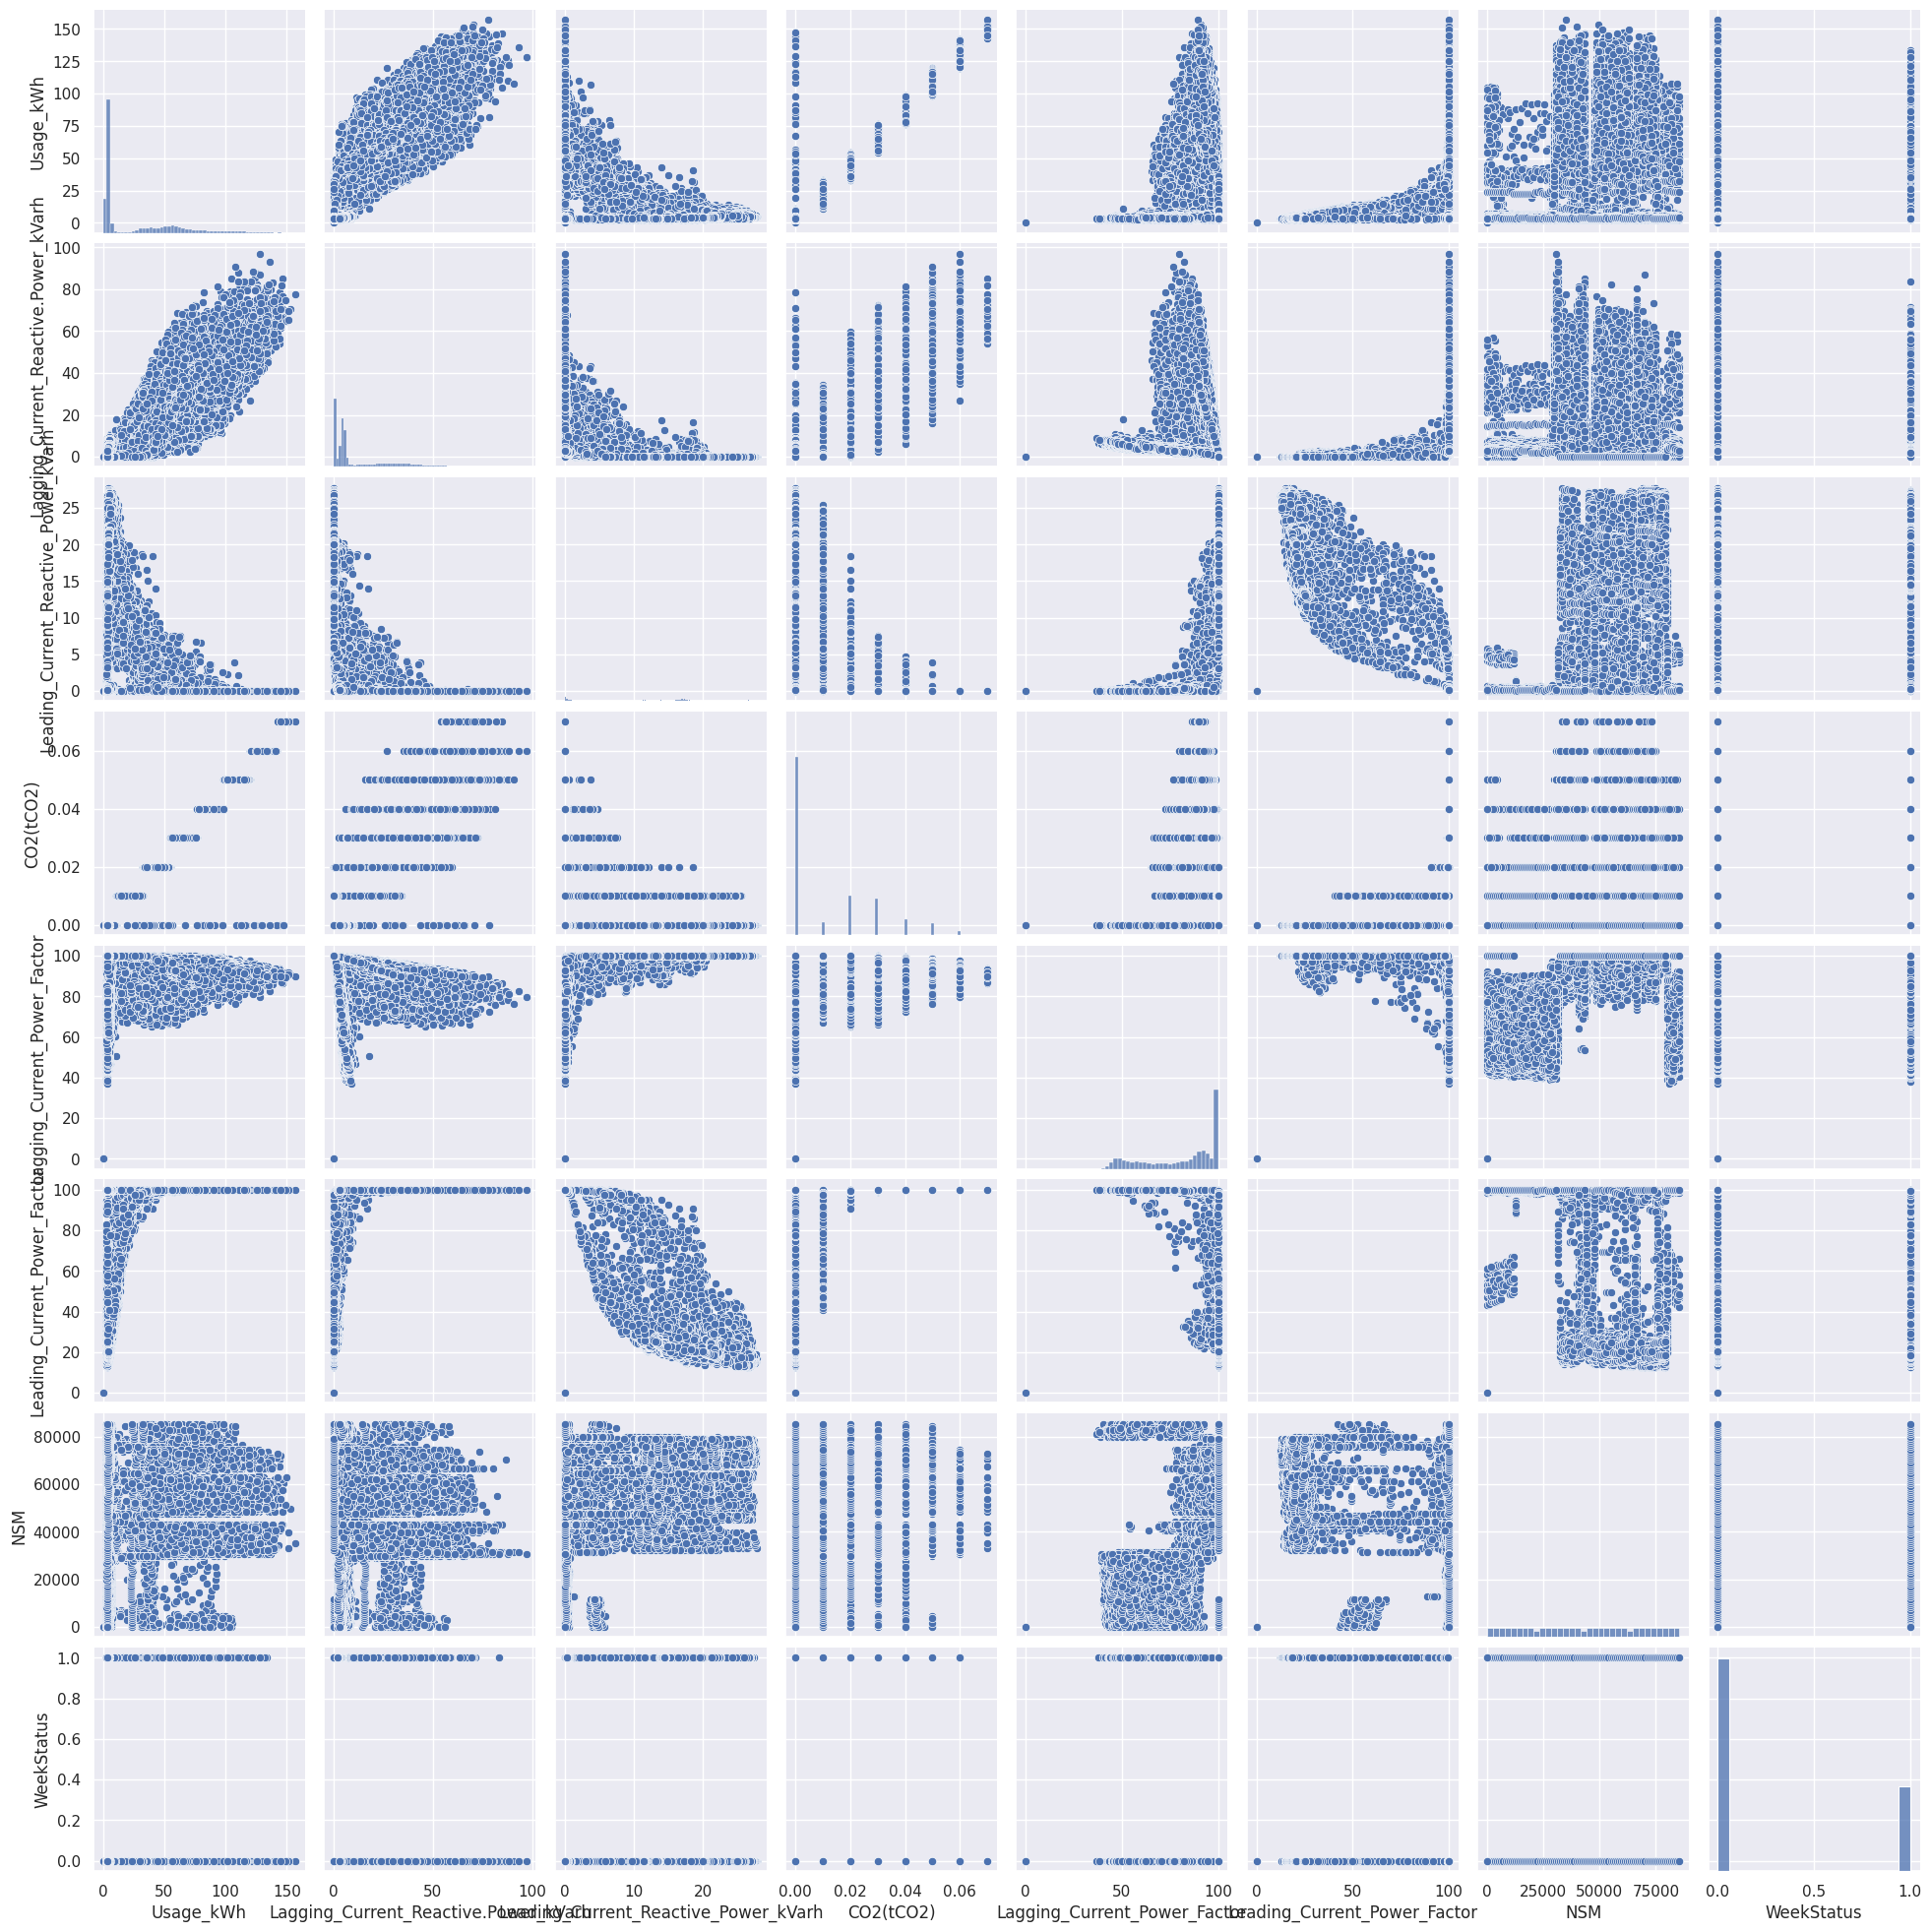

In [ ]:
sns.pairplot(X,diag_kind='hist')


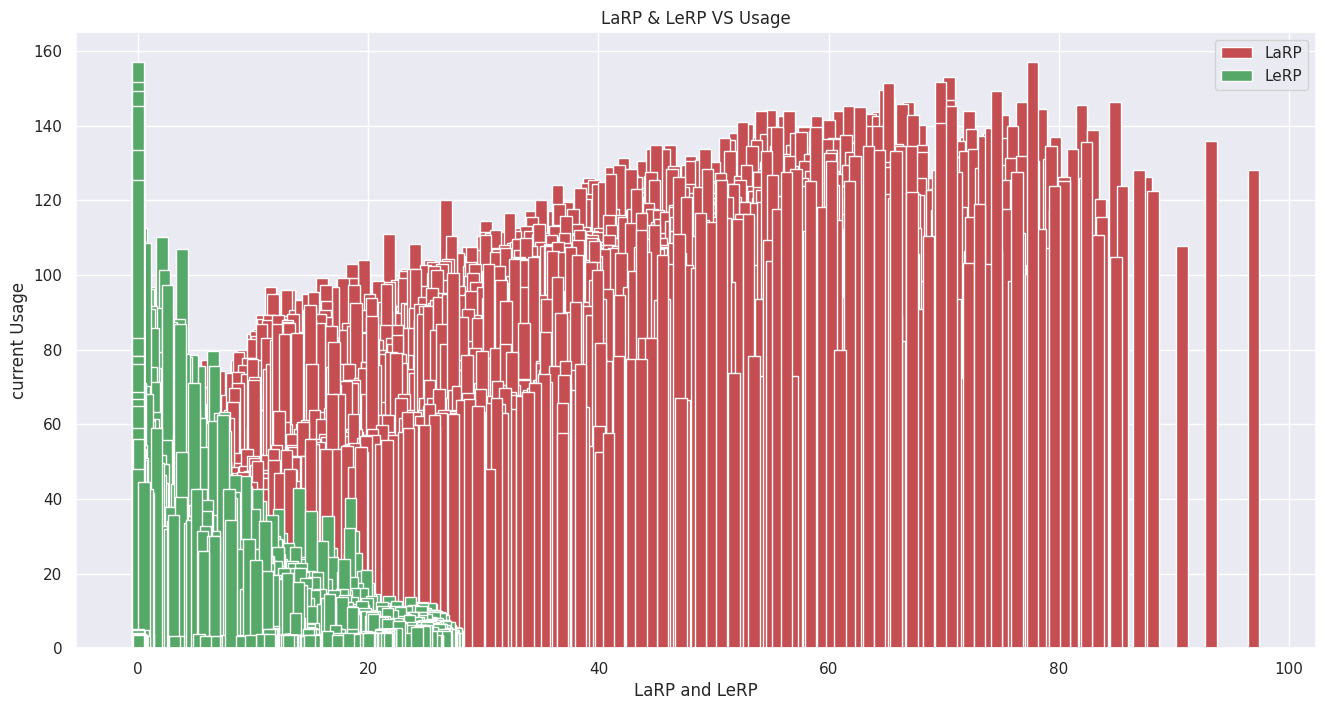

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})
bar1=plt.bar(df['LaRP'],df['Usage'], color='r',width=1)
bar2=plt.bar(df['LeRP'],df['Usage'], color='g',width=1)
plt.xlabel('LaRP and LeRP')
plt.ylabel('current Usage')
plt.title('LaRP & LeRP VS Usage')
plt.legend((bar1,bar2),('LaRP','LeRP'))
plt.show()


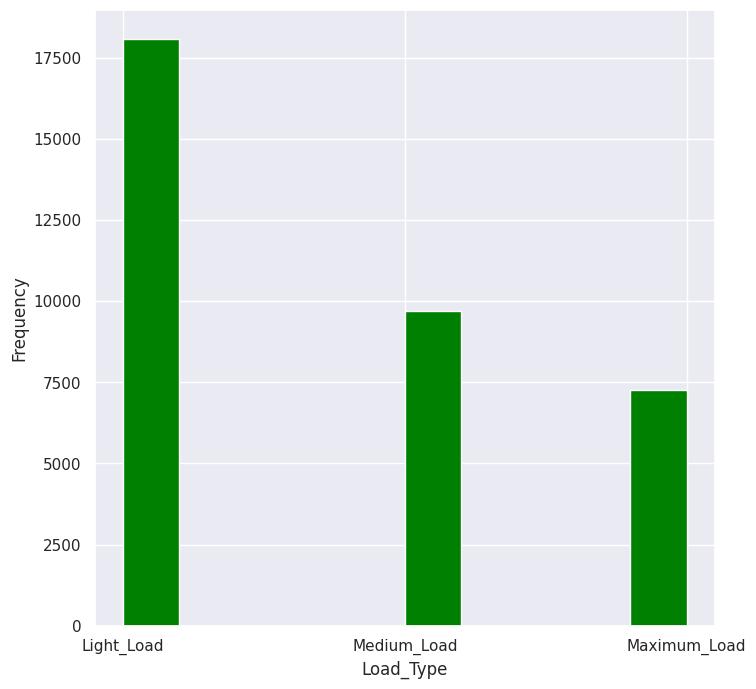

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
plt.hist(data['Load_Type'],color='green')
plt.xlabel('Load_Type')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [ ]:
x=df[['LeRP','LaRP','LePF','LaPF','NSM','WeekStatus','LL']]
y=df['Usage']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,test_size=0.70)
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)
print(y_pred)
print("MSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))

[48.89469434 13.25045015 21.42346733 ... 79.92111916 90.23480153
 11.13436947]
MSE: 9.668844149357314
MAE: 6.916513100293192
MAPE: 12782613216154.977
R2: 0.9160259716174932


In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.20,test_size=0.80)
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)
print(y_pred)
print("MSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))

[-0.40000653  5.47346508  5.89579845 ... 45.04799864 -3.65786381
 -1.66389582]
MSE: 9.66281504478668
MAE: 6.94502807383323
MAPE: 11136859420908.72
R2: 0.9167359319690285


In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,train_size=0.75)
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)
print(y_pred)
print("MSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))

[ 42.47227208  53.3494952   78.08529658 ...  60.69588531 125.61946037
  89.12170335]
MSE: 9.694118493922637
MAE: 6.96136613040197
MAPE: 0.826944878934376
R2: 0.9174201809113548


In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,train_size=0.65)
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)
print(y_pred)
print("MSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))

[88.2651811  32.80111913 -3.21719893 ...  2.11407415 77.23868797
  1.30734448]
MSE: 9.7734848122847
MAE: 6.972343385267271
MAPE: 0.8299404344167918
R2: 0.9161709707264996


In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,train_size=0.60)
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)
print(y_pred)
print("MSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))

[ 23.77921556  -1.21395826  69.03010243 ...  81.89905272 103.69289327
  12.72967806]
MSE: 9.596174372596346
MAE: 6.880238991654515
MAPE: 22279111086675.72
R2: 0.918695835797446


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
x=df1.drop(['Usage','CO2'],axis=1)
y=df1['Usage']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
   vif=pd.DataFrame()
   vif['variables']=x.columns
   vif["VIF"]=[variance_inflation_factor(x.values,i).round(1) for i in range(x.shape[1])]

   return(vif)

calc_vif(x_train)

,variables,VIF
0,LaRP,1.7
1,LeRP,10.9
2,LaPF,2.8
3,LePF,11.9
4,NSM,1.9
5,WeekStatus,1.2
6,LL,104.2
7,MaxL,56.0
8,MinL,72.3


In [ ]:
calc_vif(x_train.drop('LL',axis=1))


,variables,VIF
0,LaRP,2.8
1,LeRP,6.3
2,LaPF,33.1
3,LePF,15.8
4,NSM,7.2
5,WeekStatus,1.7
6,MaxL,2.4
7,MinL,2.7


In [ ]:
calc_vif(x_train.drop(['LL','LaPF'], axis=1))

,variables,VIF
0,LaRP,2.6
1,LeRP,2.4
2,LePF,3.9
3,NSM,6.6
4,WeekStatus,1.6
5,MaxL,2.2
6,MinL,2.6


fitting least squares method for original data

In [ ]:
import statsmodels.api as sm
x_train_constant=sm.add_constant(x_train)
model=sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Usage   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 3.410e+04
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:31:05   Log-Likelihood:                -90384.
No. Observations:               24528   AIC:                         1.808e+05
Df Residuals:                   24519   BIC:                         1.809e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LaRP           1.4454      0.005    292.128      0.0

removing insignifiacnt variable for original data


In [ ]:
insig=x_train.drop(['LeRP'], axis=1)

In [ ]:
constant1=sm.add_constant(insig)
modelW=sm.OLS(y_train,constant1).fit()
print(modelW.summary())

                            OLS Regression Results                            
Dep. Variable:                  Usage   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 3.897e+04
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:31:05   Log-Likelihood:                -90384.
No. Observations:               24528   AIC:                         1.808e+05
Df Residuals:                   24520   BIC:                         1.808e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -48.8254      0.496    -98.528      0.0

In [ ]:
insig=x_train.drop(['LeRP','NSM'], axis=1)
constant1=sm.add_constant(insig)
modelW=sm.OLS(y_train,constant1).fit()
print(modelW.summary())

                            OLS Regression Results                            
Dep. Variable:                  Usage   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 4.546e+04
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:31:05   Log-Likelihood:                -90386.
No. Observations:               24528   AIC:                         1.808e+05
Df Residuals:                   24521   BIC:                         1.808e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -48.5137      0.477   -101.663      0.0

OLS after removing multi collinear variables

In [ ]:
x_train_nomulti=x_train.drop(['LL','LaPF'], axis=1)

In [ ]:
x_train_constant2=sm.add_constant(x_train_nomulti)
model2=sm.OLS(y_train,x_train_constant2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Usage   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                 2.420e+04
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:31:05   Log-Likelihood:                -95624.
No. Observations:               24528   AIC:                         1.913e+05
Df Residuals:                   24520   BIC:                         1.913e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9049      0.858    -10.382      0.0

Assigning constants to their respective variables

In [ ]:
feature=['LaRP','LeRP','LaPF','LePF','NSM','WeekStatus','LL']
x_1=df1[feature]
y_1=df1.Usage
lm1=LinearRegression()
lm1.fit(x_1,y_1)
print(lm1.intercept_)
print(lm1.coef_)

-61.95627653048774
[ 1.43890550e+00  6.91057194e-03  6.14684661e-01  2.87139122e-01
  8.40638720e-06  1.27491471e+00 -7.59726284e+00]


In [ ]:
{i:j for i,j in zip(feature,lm1.coef_)}

{'LaRP': 1.4389054976545923,
 'LeRP': 0.006910571935809347,
 'LaPF': 0.614684661318377,
 'LePF': 0.2871391223314279,
 'NSM': 8.406387200139004e-06,
 'WeekStatus': 1.2749147087231987,
 'LL': -7.597262836943752}

after removing multicollinearity

In [ ]:
feature=['LaRP','LeRP','LePF','NSM','WeekStatus','MaxL','MinL']
x_2=df[feature]
y_2=df.Usage
lm2=LinearRegression()
lm2.fit(x_2,y_2)
print(lm2.intercept_)
print(lm2.coef_)

-9.634044394362991
[ 1.57137696e+00 -7.11398574e-02  6.15900437e-02  4.46300271e-05
  2.45062476e+00  1.91520670e+01  1.81982845e+01]


In [ ]:
{i:j for i,j in zip(feature,lm2.coef_)}

{'LaRP': 1.5713769597115852,
 'LeRP': -0.07113985735910558,
 'LePF': 0.061590043741418105,
 'NSM': 4.463002714091835e-05,
 'WeekStatus': 2.450624761451664,
 'MaxL': 19.152067043869593,
 'MinL': 18.198284490167083}

linear regression after multicollinearity


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


linear regression after removing multi collinear variables

In [ ]:
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_2,y_2,test_size=0.25,train_size=0.75)
lm2=LinearRegression()
lm2.fit(x_train_1,y_train_1)
y_pred_1=lm2.predict(x_test_1)
print(y_pred_1)
print("MSE:",np.sqrt(metrics.mean_squared_error(y_test_1,y_pred_1)))
print("MAE:",mean_absolute_error(y_test_1,y_pred_1))
print("MAPE:",mean_absolute_percentage_error(y_test_1,y_pred_1))
print("R2:",r2_score(y_test_1,y_pred_1))


[ -8.34064501  43.96437301  -3.51727226 ... 104.25766423  92.76688281
   6.14881694]
MSE: 12.033138133923936
MAE: 8.400998659704587
MAPE: 1.0172569917719618
R2: 0.873099812039724


In [ ]:
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_2,y_2,test_size=0.30,train_size=0.70)
lm2=LinearRegression()
lm2.fit(x_train_1,y_train_1)
y_pred_1=lm2.predict(x_test_1)
print(y_pred_1)
print("MSE:",np.sqrt(metrics.mean_squared_error(y_test_1,y_pred_1)))
print("MAE:",mean_absolute_error(y_test_1,y_pred_1))
print("MAPE:",mean_absolute_percentage_error(y_test_1,y_pred_1))
print("R2:",r2_score(y_test_1,y_pred_1))

[ 3.42954707 86.56990461 77.93628122 ... -7.56917212 83.8358774
 10.86967764]
MSE: 11.761527341145175
MAE: 8.320571777261247
MAPE: 1.0056219702621936
R2: 0.8739920063683447


In [ ]:
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_2,y_2,test_size=0.40,train_size=0.60)
lm2=LinearRegression()
lm2.fit(x_train_1,y_train_1)
y_pred_1=lm2.predict(x_test_1)
print(y_pred_1)
print("MSE:",np.sqrt(metrics.mean_squared_error(y_test_1,y_pred_1)))
print("MAE:",mean_absolute_error(y_test_1,y_pred_1))
print("MAPE:",mean_absolute_percentage_error(y_test_1,y_pred_1))
print("R2:",r2_score(y_test_1,y_pred_1))

[ 6.57447239 76.58784499 -3.94409081 ... 66.66659118 12.65787372
 10.72197597]
MSE: 11.948443389031194
MAE: 8.355559563598568
MAPE: 0.9902717017724589
R2: 0.870605196057699


In [ ]:
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_2,y_2,test_size=0.20,train_size=0.80)
lm2=LinearRegression()
lm2.fit(x_train_1,y_train_1)
y_pred_1=lm2.predict(x_test_1)
print(y_pred_1)
print("MSE:",np.sqrt(metrics.mean_squared_error(y_test_1,y_pred_1)))
print("MAE:",mean_absolute_error(y_test_1,y_pred_1))
print("MAPE:",mean_absolute_percentage_error(y_test_1,y_pred_1))
print("R2:",r2_score(y_test_1,y_pred_1))

[133.36799896   3.89138042   3.47158637 ...   8.96793816   4.71241343
  55.2766662 ]
MSE: 11.913134614116192
MAE: 8.374136158073286
MAPE: 0.9892696212463316
R2: 0.8753004035913213


In [ ]:
feature=['LaRP','LaPF','LePF','WeekStatus','LL']
x_is=df1[feature]
y_is=df1.Usage
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x_is,y_is,test_size=0.20,train_size=0.80)
lm3=LinearRegression()
lm3.fit(x_train_2,y_train_2)
y_pred_2=lm3.predict(x_test_2)
print(y_pred_2)
print("MSE:",np.sqrt(metrics.mean_squared_error(y_test_2,y_pred_2)))
print("MAE:",mean_absolute_error(y_test_2,y_pred_2))
print("MAPE:",mean_absolute_percentage_error(y_test_2,y_pred_2))
print("R2:",r2_score(y_test_2,y_pred_2))

[29.58315242  7.97507049  9.41806858 ...  1.38628437  3.15260983
 79.00159906]
MSE: 9.617036053334157
MAE: 6.935955053380318
MAPE: 0.842613890713764
R2: 0.9170498893945002


In [ ]:
feature=['LaRP','LaPF','LePF','WeekStatus','LL']
x_is=df1[feature]
y_is=df1.Usage
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x_is,y_is,test_size=0.30,train_size=0.70)
lm3=LinearRegression()
lm3.fit(x_train_2,y_train_2)
y_pred_2=lm3.predict(x_test_2)
print(y_pred_2)
print("MSE:",np.sqrt(metrics.mean_squared_error(y_test_2,y_pred_2)))
print("MAE:",mean_absolute_error(y_test_2,y_pred_2))
print("MAPE:",mean_absolute_percentage_error(y_test_2,y_pred_2))
print("R2:",r2_score(y_test_2,y_pred_2))

[11.04476684  5.12192394  3.56775664 ...  5.78329475 45.74837441
 63.35639614]
MSE: 9.580784023974482
MAE: 6.9002637263208895
MAPE: 29805169191493.46
R2: 0.9189457999618345


In [ ]:
feature=['LaRP','LaPF','LePF','WeekStatus','LL']
x_is=df1[feature]
y_is=df1.Usage
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x_is,y_is,test_size=0.25,train_size=0.75)
lm3=LinearRegression()
lm3.fit(x_train_2,y_train_2)
y_pred_2=lm3.predict(x_test_2)
print(y_pred_2)
print("MSE:",np.sqrt(metrics.mean_squared_error(y_test_2,y_pred_2)))
print("MAE:",mean_absolute_error(y_test_2,y_pred_2))
print("MAPE:",mean_absolute_percentage_error(y_test_2,y_pred_2))
print("R2:",r2_score(y_test_2,y_pred_2))

[-3.68614152 83.33604725  5.99156769 ... 71.35125778 -4.08091951
 26.20549372]
MSE: 9.646237358641306
MAE: 6.973331445277859
MAPE: 35662469733739.24
R2: 0.9166541674309046


In [ ]:
feature=['LaRP','LaPF','LePF','WeekStatus','LL']
x_is=df1[feature]
y_is=df1.Usage
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x_is,y_is,test_size=0.40,train_size=0.60)
lm3=LinearRegression()
lm3.fit(x_train_2,y_train_2)
y_pred_2=lm3.predict(x_test_2)
print(y_pred_2)
print("MSE:",np.sqrt(metrics.mean_squared_error(y_test_2,y_pred_2)))
print("MAE:",mean_absolute_error(y_test_2,y_pred_2))
print("MAPE:",mean_absolute_percentage_error(y_test_2,y_pred_2))
print("R2:",r2_score(y_test_2,y_pred_2))

[60.0025896   7.2592562  60.64857999 ...  6.0130155  46.57192264
  6.51462611]
MSE: 9.611049327169871
MAE: 6.885259315090633
MAPE: 0.8513026940515283
R2: 0.9175300143908905


KNN


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

before multicollinearity

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,train_size=0.60)
model_k1=KNeighborsRegressor(n_neighbors=7)
model_k1.fit(x_train,y_train)
y_pred_k1=model_k1.predict(x_test)
y_pred_k1
knn=pd.DataFrame({'Predicted':y_pred_k1,'Actual':y_test})
print(knn)
print(model_k1.score(x_test,y_test))
print("MAE:",mean_absolute_error(y_test,y_pred_k1))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_k1))


       Predicted  Actual
14975   3.521429    3.56
30884   3.898571    4.03
29777   2.781429    3.02
21454   3.087143    2.70
32335  57.100000   50.44
...          ...     ...
11365   3.147143    3.13
11613   2.900000    2.88
26473   3.610000    3.49
33414   3.667143    4.14
34796  32.628571   26.17

[14016 rows x 2 columns]
0.9755295400963145
MAE: 2.129712165688193
MAPE: 0.07934909934055738


In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,train_size=0.70)
model_k2=KNeighborsRegressor(n_neighbors=7)
model_k2.fit(x_train,y_train)
y_pred_k2=model_k2.predict(x_test)
y_pred_k2
knn=pd.DataFrame({'Predicted':y_pred_k2,'Actual':y_test})
print(knn)
print(model_k2.score(x_test,y_test))
print("MAE:",mean_absolute_error(y_test,y_pred_k2))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_k2))


       Predicted  Actual
12315   3.324286    3.46
5102    4.292857    6.01
15104  77.141429   78.26
2653   31.092857   30.10
18135   3.085714    2.95
...          ...     ...
23798   3.820000    3.74
30688  60.732857   60.16
20566   2.905714    2.81
7237   56.737143   65.92
19473   3.148571    3.06

[10512 rows x 2 columns]
0.979299218737079
MAE: 2.024227005870841
MAPE: 0.07401041162492103


In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,train_size=0.75)
model_k3=KNeighborsRegressor(n_neighbors=7)
model_k3.fit(x_train,y_train)
y_pred_k3=model_k3.predict(x_test)
y_pred_k3
knn=pd.DataFrame({'Predicted':y_pred_k3,'Actual':y_test})
print(knn)
print(model_k3.score(x_test,y_test))
print("MAE:",mean_absolute_error(y_test,y_pred_k3))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_k3))

        Predicted  Actual
4859    80.150000   99.58
23010   44.897143   35.93
6549     3.908571    3.06
15061    3.732857    3.78
27596  102.332857  103.25
...           ...     ...
7564    38.914286   43.13
16694    3.008571    2.84
16874   38.068571   33.41
21251   49.212857   47.84
33281   99.097143  105.37

[8760 rows x 2 columns]
0.979497357162598
MAE: 2.013970808871494
MAPE: 1474759956255.7766


In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,train_size=0.80)
model_k4=KNeighborsRegressor(n_neighbors=7)
model_k4.fit(x_train,y_train)
y_pred_k4=model_k4.predict(x_test)
y_pred_k4
knn=pd.DataFrame({'Predicted':y_pred_k4,'Actual':y_test})
print(knn)
print(model_k4.score(x_test,y_test))
print("MAE:",mean_absolute_error(y_test,y_pred_k4))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_k4))

       Predicted  Actual
8207   47.554286   47.12
19903   3.950000    3.96
28006  30.874286   30.64
29482   3.171429    3.28
18851  83.884286   89.21
...          ...     ...
13442   2.887143    3.02
5052   67.298571   64.30
16915   3.142857    3.28
30331   4.244286    5.04
31056   5.821429    6.12

[7008 rows x 2 columns]
0.9838013619377656
MAE: 1.821263250163079
MAPE: 0.06880871937758368


after multi collinearity

In [ ]:

x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_1,y_1,test_size=0.40,train_size=0.60)
model_k5=KNeighborsRegressor(n_neighbors=7)
model_k5.fit(x_train_1,y_train_1)
y_pred_k5=model_k5.predict(x_test_1)
y_pred_k5
knn=pd.DataFrame({'Predicted':y_pred_k5,'Actual':y_test_1})
print(knn)
print(model_k5.score(x_test_1,y_test_1))
print("MAE:",mean_absolute_error(y_test_1,y_pred_k5))
print("MAPE:",mean_absolute_percentage_error(y_test_1,y_pred_k5))


       Predicted  Actual
18958  63.378571   54.72
22280   2.934286    2.77
33740  55.790000   60.05
17624  50.477143   48.74
24100   2.787143    2.77
...          ...     ...
12087   3.718571    3.60
2503    5.107143   14.72
14276  54.792857   54.50
34626  50.635714   45.79
33186  63.178571   66.13

[14016 rows x 2 columns]
0.9756089748851049
MAE: 2.1785759132420095
MAPE: 0.07902889207509868


In [ ]:

x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_1,y_1,test_size=0.30,train_size=0.70)
model_k7=KNeighborsRegressor(n_neighbors=7)
model_k7.fit(x_train_1,y_train_1)
y_pred_k7=model_k7.predict(x_test_1)
y_pred_k7
knn=pd.DataFrame({'Predicted':y_pred_k7,'Actual':y_test_1})

print(knn)
print(model_k7.score(x_test_1,y_test_1))
print("MAE:",mean_absolute_error(y_test_1,y_pred_k7))
print("MAPE:",mean_absolute_percentage_error(y_test_1,y_pred_k7))

       Predicted  Actual
27179   3.194286    3.64
1356    4.414286    4.68
24626   4.457143    4.64
8378    3.111429    2.99
29178   3.600000    4.07
...          ...     ...
19497   3.117143    2.99
17917  85.804286   78.88
25158   2.771429    2.66
2049   78.358571   78.41
27764   3.285714    3.56

[10512 rows x 2 columns]
0.9803028486806259
MAE: 1.9194506958034354
MAPE: 0.07256603302925263


In [ ]:

x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_1,y_1,test_size=0.20,train_size=0.80)
model_k8=KNeighborsRegressor(n_neighbors=7)
model_k8.fit(x_train_1,y_train_1)
y_pred_k8=model_k8.predict(x_test_1)
y_pred_k8
knn=pd.DataFrame({'Predicted':y_pred_k8,'Actual':y_test_1})
print(knn)
print(model_k8.score(x_test_1,y_test_1))
print("MAE:",mean_absolute_error(y_test_1,y_pred_k8))
print("MAPE:",mean_absolute_percentage_error(y_test_1,y_pred_k8))

        Predicted  Actual
15127  100.507143   92.59
31319    3.307143    2.95
2044     4.037143    4.25
19573    4.198571    4.21
11783   28.815714   28.87
...           ...     ...
9600     3.570000    3.82
19898    2.991429    3.02
471      4.371429    4.54
23601   38.134286   26.42
19036    2.951429    2.66

[7008 rows x 2 columns]
0.9823408995804156
MAE: 1.852868558382257
MAPE: 0.06930336306868952


In [ ]:

x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_1,y_1,test_size=0.25,train_size=0.75)
model_k9=KNeighborsRegressor(n_neighbors=7)
model_k9.fit(x_train_1,y_train_1)
y_pred_k9=model_k9.predict(x_test_1)
y_pred_k9
knn=pd.DataFrame({'Predicted':y_pred_k9,'Actual':y_test_1})
print(knn)
print(model_k9.score(x_test_1,y_test_1))
print("MAE:",mean_absolute_error(y_test_1,y_pred_k9))
print("MAPE:",mean_absolute_percentage_error(y_test_1,y_pred_k9))


        Predicted  Actual
24354  101.011429   99.11
29358   67.927143   62.14
21576   68.678571   68.29
34576    3.177143    2.99
11941    3.105714    3.17
...           ...     ...
15986    3.427143    3.35
26694    2.830000    3.49
19618   96.820000   94.61
32229    3.408571    3.60
5259    51.630000   89.35

[8760 rows x 2 columns]
0.9809011736314337
MAE: 1.8980759947814743
MAPE: 0.0712991776429657


In [ ]:
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x_is,y_is,test_size=0.25,train_size=0.75)
model_k9=KNeighborsRegressor(n_neighbors=7)
model_k9.fit(x_train_2,y_train_2)
y_pred_k9=model_k9.predict(x_test_2)
y_pred_k9
knn=pd.DataFrame({'Predicted':y_pred_k9,'Actual':y_test_2})
print(knn)
print(model_k9.score(x_test_2,y_test_2))
print("MAE:",mean_absolute_error(y_test_2,y_pred_k9))
print("MAPE:",mean_absolute_percentage_error(y_test_2,y_pred_k9))

       Predicted  Actual
19787   3.105714    3.17
17074   3.678571    3.64
31829  70.810000   71.89
1424   79.707143   79.09
26634  55.364286   55.62
...          ...     ...
20575   3.280000    3.24
24667   2.765714    2.70
14700   2.921429    2.99
20620   3.465714    2.95
24440  92.355714   91.51

[8760 rows x 2 columns]
0.9985680239479228
MAE: 0.5551415525114156
MAPE: 1662777161834.1667


In [ ]:
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x_is,y_is,test_size=0.30,train_size=0.70)
model_k9=KNeighborsRegressor(n_neighbors=7)
model_k9.fit(x_train_2,y_train_2)
y_pred_k9=model_k9.predict(x_test_2)
y_pred_k9
knn=pd.DataFrame({'Predicted':y_pred_k9,'Actual':y_test_2})
print(knn)
print(model_k9.score(x_test_2,y_test_2))
print("MAE:",mean_absolute_error(y_test_2,y_pred_k9))
print("MAPE:",mean_absolute_percentage_error(y_test_2,y_pred_k9))

       Predicted  Actual
32456   3.920000    3.85
11628   2.870000    2.88
5927    4.351429    5.04
34078   3.815714    4.00
13026  96.808571   96.01
...          ...     ...
10512   6.994286    5.58
18901   4.961429    4.18
28139   3.812857    3.85
12007   3.091429    3.10
5744    4.652857    5.36

[10512 rows x 2 columns]
0.9985137657311177
MAE: 0.5551897151554686
MAPE: 0.05344139894677688


In [ ]:
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x_is,y_is,test_size=0.20,train_size=0.80)
model_k9=KNeighborsRegressor(n_neighbors=7)
model_k9.fit(x_train_2,y_train_2)
y_pred_k9=model_k9.predict(x_test_2)
y_pred_k9
knn=pd.DataFrame({'Predicted':y_pred_k9,'Actual':y_test_2})
print(knn)
print(model_k9.score(x_test_2,y_test_2))
print("MAE:",mean_absolute_error(y_test_2,y_pred_k9))
print("MAPE:",mean_absolute_percentage_error(y_test_2,y_pred_k9))

       Predicted  Actual
12602   3.081429    3.06
5520    8.784286    9.94
24159  26.571429   17.71
30117   3.758571    3.67
7328    3.057143    2.95
...          ...     ...
19688   2.970000    3.02
22381   2.932857    2.95
29617   6.624286    6.62
7997    3.107143    2.99
29869   3.044286    3.06

[7008 rows x 2 columns]
0.9984470195416657
MAE: 0.5572011578604045
MAPE: 0.05164099005627041


In [ ]:
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x_is,y_is,test_size=0.40,train_size=0.60)
model_k9=KNeighborsRegressor(n_neighbors=7)
model_k9.fit(x_train_2,y_train_2)
y_pred_k9=model_k9.predict(x_test_2)
y_pred_k9
knn=pd.DataFrame({'Predicted':y_pred_k9,'Actual':y_test_2})
print(knn)
print(model_k9.score(x_test_2,y_test_2))
print("MAE:",mean_absolute_error(y_test_2,y_pred_k9))
print("MAPE:",mean_absolute_percentage_error(y_test_2,y_pred_k9))

       Predicted  Actual
565     3.845714    3.49
1190   68.344286   57.31
34721  33.597143   30.13
6139    6.644286    6.77
5361    3.595714    4.72
...          ...     ...
7198    3.661429    3.64
34049  59.714286   59.69
17973   3.180000    3.17
28258  48.192857   48.35
28602   3.598571    3.53

[14016 rows x 2 columns]
0.9983258971575949
MAE: 0.5832637190150032
MAPE: 1103958445840.1172


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
split_ratios = [0.25, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ratio, random_state=1)
    DT_model = DecisionTreeRegressor()
    DT_model.fit(x_train, y_train)
    Dt_y_pred = DT_model.predict(x_test)
    DT_MAE = mean_absolute_error(y_test, Dt_y_pred)
    DT_R2 = r2_score(y_test, Dt_y_pred)
    print(f"Split Ratio: {ratio}, MAE: {DT_MAE}, R Score: {DT_R2}")

Split Ratio: 0.25, MAE: 0.45128652968036526, R Score: 0.998878980464321
Split Ratio: 0.2, MAE: 0.43473744292237443, R Score: 0.9989801459337869
Split Ratio: 0.3, MAE: 0.4856773211567732, R Score: 0.998558278059114
Split Ratio: 0.4, MAE: 0.5271675228310502, R Score: 0.9982398264596055


In [ ]:
split_ratios = [0.25, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=ratio, random_state=1)
    DT_model = DecisionTreeRegressor()
    DT_model.fit(x_train_1, y_train_1)
    Dt_y_pred = DT_model.predict(x_test_1)
    DT_MAE = mean_absolute_error(y_test_1, Dt_y_pred)
    DT_R2 = r2_score(y_test_1, Dt_y_pred)
    print(f"Split Ratio: {ratio}, MAE: {DT_MAE}, R Score: {DT_R2}")

Split Ratio: 0.25, MAE: 0.44188584474885845, R Score: 0.9989328958383684
Split Ratio: 0.2, MAE: 0.4304865867579909, R Score: 0.9989454167996988
Split Ratio: 0.3, MAE: 0.4717551369863014, R Score: 0.9986284942963294
Split Ratio: 0.4, MAE: 0.5254808789954337, R Score: 0.9981588556872375


In [ ]:
split_ratios = [0.25, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_is, y_is, test_size=ratio, random_state=1)
    DT_model = DecisionTreeRegressor()
    DT_model.fit(x_train_2, y_train_2)
    Dt_y_pred = DT_model.predict(x_test_2)
    DT_MAE = mean_absolute_error(y_test_2, Dt_y_pred)
    DT_R2 = r2_score(y_test_2, Dt_y_pred)
    print(f"Split Ratio: {ratio}, MAE: {DT_MAE}, R Score: {DT_R2}")

Split Ratio: 0.25, MAE: 0.6285081865622961, R Score: 0.9982391887965758
Split Ratio: 0.2, MAE: 0.6165905020113068, R Score: 0.9982146492032661
Split Ratio: 0.3, MAE: 0.6492802058418496, R Score: 0.9980486866877151
Split Ratio: 0.4, MAE: 0.6678982160977024, R Score: 0.9980803186732045


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
split_ratios = [0.25, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    x_train_1,x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=ratio, random_state=1)
    rf_model = RandomForestRegressor()
    rf_model.fit(x_train_1, y_train_1)
    Rf_y_pred = rf_model.predict(x_test_1)
    RF_mae = mean_absolute_error(y_test_1, Rf_y_pred)
    RF_R2 = r2_score(y_test_1, Rf_y_pred)
    print(f"Split Ratio: {ratio},MAE: {RF_mae}, R Score: {RF_R2}")

Split Ratio: 0.25,MAE: 0.21437575342465715, R Score: 0.999610263579067
Split Ratio: 0.2,MAE: 0.21566115867579871, R Score: 0.9996069035476808
Split Ratio: 0.3,MAE: 0.22628338089802097, R Score: 0.9995044612174989
Split Ratio: 0.4,MAE: 0.25246338470319596, R Score: 0.999374087838368


In [ ]:
split_ratios = [0.25, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=ratio, random_state=1)
    rf_model = RandomForestRegressor()
    rf_model.fit(x_train, y_train)
    Rf_y_pred = rf_model.predict(x_test)
    RF_mae = mean_absolute_error(y_test, Rf_y_pred)
    RF_R2 = r2_score(y_test, Rf_y_pred)
    print(f"Split Ratio: {ratio},MAE: {RF_mae}, R Score: {RF_R2}")


Split Ratio: 0.25,MAE: 0.2215036415525114, R Score: 0.999593025950683
Split Ratio: 0.2,MAE: 0.21760148401826432, R Score: 0.9995812362407243
Split Ratio: 0.3,MAE: 0.23398165905631674, R Score: 0.9994806311819904
Split Ratio: 0.4,MAE: 0.2552900542237439, R Score: 0.9993574516041416


In [ ]:
split_ratios = [0.25, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    x_train_2,x_test_2, y_train_2, y_test_2 = train_test_split(x_is, y_is, test_size=ratio, random_state=1)
    rf_model = RandomForestRegressor()
    rf_model.fit(x_train_2, y_train_2)
    Rf_y_pred = rf_model.predict(x_test_2)
    RF_mae = mean_absolute_error(y_test_2, Rf_y_pred)
    RF_R2 = r2_score(y_test_2, Rf_y_pred)
    print(f"Split Ratio: {ratio}, MAE: {RF_mae}, R Score: {RF_R2}")

Split Ratio: 0.25, MAE: 0.40646496773785795, R Score: 0.9990632597969301
Split Ratio: 0.2, MAE: 0.4032358111473008, R Score: 0.9990867763647063
Split Ratio: 0.3, MAE: 0.41448856148461694, R Score: 0.9990273144998048
Split Ratio: 0.4, MAE: 0.43026974166054566, R Score: 0.9989447516003703


In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
base_model_2 = DecisionTreeRegressor(max_features = "sqrt")

In [ ]:
split_ratios = [0.25, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ratio, random_state=1)
    ba_model_2 = BaggingRegressor(base_model_2, n_estimators = 100, random_state = 1)
    ba_model_2.fit(x_train, y_train)
    y_pred_2 = ba_model_2.predict(x_test)
    BA_MAE_2 = mean_absolute_error(y_test, y_pred_2)
    BA_R2_2 = r2_score(y_test, y_pred_2)
    print(f"Split Ratio: {ratio}, MAE: {BA_MAE_2}, R Score: {BA_R2_2}")

Split Ratio: 0.25, MAE: 0.6916379566210044, R Score: 0.9974728663052979
Split Ratio: 0.2, MAE: 0.6802139554794518, R Score: 0.9975243108360045
Split Ratio: 0.3, MAE: 0.7527527492389645, R Score: 0.9969104941630762
Split Ratio: 0.4, MAE: 0.7813861515410958, R Score: 0.9966128434311846


In [ ]:
split_ratios = [0.25, 0.2, 0.3, 0.4]
base_model_2 = DecisionTreeRegressor(max_features = "sqrt")
for ratio in split_ratios:
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=ratio, random_state=1)
    ba_model_2 = BaggingRegressor(base_model_2, n_estimators = 100, random_state = 1)
    ba_model_2.fit(x_train_1, y_train_1)
    y_pred_2 = ba_model_2.predict(x_test_1)
    BA_MAE_2 = mean_absolute_error(y_test_1, y_pred_2)
    BA_R2_2 = r2_score(y_test_1, y_pred_2)
    print(f"Split Ratio: {ratio}, MAE: {BA_MAE_2}, R Score: {BA_R2_2}")

Split Ratio: 0.25, MAE: 0.6785845928462709, R Score: 0.9975424579670079
Split Ratio: 0.2, MAE: 0.6666314783105022, R Score: 0.9975052883789308
Split Ratio: 0.3, MAE: 0.7320911339421613, R Score: 0.9970349890988559
Split Ratio: 0.4, MAE: 0.7667859565258753, R Score: 0.9966671014840396


In [ ]:
split_ratios = [0.25, 0.2, 0.3, 0.4]
base_model_2 = DecisionTreeRegressor(max_features = "sqrt")

for ratio in split_ratios:
    x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_is, y_is, test_size=ratio, random_state=1)
    ba_model_2 = BaggingRegressor(base_model_2, n_estimators = 100, random_state = 1)
    ba_model_2.fit(x_train_2, y_train_2)
    Ba_y_pred_2 = ba_model_2.predict(x_test_2)
    BA_MAE_2 = mean_absolute_error(y_test_2, Ba_y_pred_2)
    BA_R2_2 = r2_score(y_test_2, Ba_y_pred_2)
    print(f"Split Ratio: {ratio}, MAE: {BA_MAE_2}, R Score: {BA_R2_2}")

Split Ratio: 0.25, MAE: 0.544223614047841, R Score: 0.9985305569168326
Split Ratio: 0.2, MAE: 0.545021704211197, R Score: 0.998507459516208
Split Ratio: 0.3, MAE: 0.5676244393481168, R Score: 0.9983778104466098
Split Ratio: 0.4, MAE: 0.5977291713796768, R Score: 0.9981344791470439


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
split_ratios = [0.25, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=ratio, random_state=1)
    gf_model = GradientBoostingRegressor()
    gf_model.fit(x_train, y_train)
    Gf_y_pred = gf_model.predict(x_test)
    GF_mae = mean_absolute_error(y_test, Gf_y_pred)
    GF_R2 = r2_score(y_test, Gf_y_pred)
    print(f"Split Ratio: {ratio}, MAE: {GF_mae}, R Score: {GF_R2}")

Split Ratio: 0.25, MAE: 1.2112455610086066, R Score: 0.9959262928209743
Split Ratio: 0.2, MAE: 1.2357187319674596, R Score: 0.9957246213633338
Split Ratio: 0.3, MAE: 1.206762026282183, R Score: 0.9958738108439852
Split Ratio: 0.4, MAE: 1.2180435108117356, R Score: 0.9956436870515977


In [ ]:
split_ratios = [0.25, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    x_train_1,x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=ratio, random_state=1)
    gf_model = GradientBoostingRegressor()
    gf_model.fit(x_train_1, y_train_1)
    Gf_y_pred = gf_model.predict(x_test_1)
    GF_mae = mean_absolute_error(y_test_1, Gf_y_pred)
    GF_R2 = r2_score(y_test_1, Gf_y_pred)
    print(f"Split Ratio: {ratio}, MAE: {GF_mae}, R Score: {GF_R2}")

Split Ratio: 0.25, MAE: 1.2199259508267057, R Score: 0.9958108002618445
Split Ratio: 0.2, MAE: 1.2097804693764904, R Score: 0.9958507843900986
Split Ratio: 0.3, MAE: 1.2048704764269211, R Score: 0.9958174402708889
Split Ratio: 0.4, MAE: 1.2104117203092097, R Score: 0.9957397965783594


In [ ]:
split_ratios = [0.25, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    x_train_2,x_test_2, y_train_2, y_test_2 = train_test_split(x_is, y_is, test_size=ratio, random_state=1)
    gf_model = GradientBoostingRegressor()
    gf_model.fit(x_train_2, y_train_2)
    Gf_y_pred = gf_model.predict(x_test_2)
    GF_mae = mean_absolute_error(y_test_2, Gf_y_pred)
    GF_R2 = r2_score(y_test_2, Gf_y_pred)
    print(f"Split Ratio: {ratio}, MAE: {GF_mae}, R Score: {GF_R2}")

Split Ratio: 0.25, MAE: 1.2328671479743714, R Score: 0.9959984996490892
Split Ratio: 0.2, MAE: 1.2352871657031563, R Score: 0.9958495160767151
Split Ratio: 0.3, MAE: 1.2114896906799046, R Score: 0.9959862528898511
Split Ratio: 0.4, MAE: 1.224698873067516, R Score: 0.9958141737561723


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaler.fit(df1)
std=scaler.transform(df1)
std

array([[-0.72410486, -0.61851634, -0.52138505, ...,  0.96897421,
        -0.51174621, -0.61852709],
       [-0.69928718, -0.52591107, -0.52138505, ...,  0.96897421,
        -0.51174621, -0.61852709],
       [-0.72201181, -0.59827811, -0.52138505, ...,  0.96897421,
        -0.51174621, -0.61852709],
       ...,
       [-0.70586536, -0.60502418, -0.51195662, ...,  0.96897421,
        -0.51174621, -0.61852709],
       [-0.70586536, -0.61177026, -0.50656895, ...,  0.96897421,
        -0.51174621, -0.61852709],
       [-0.70915445, -0.61422338, -0.51195662, ...,  0.96897421,
        -0.51174621, -0.61852709]])

In [ ]:
x_std=pd.DataFrame(std,columns=df1.columns)
x_std.head(5)

,Usage,LaRP,LeRP,CO2,LaPF,LePF,NSM,WeekStatus,LL,MaxL,MinL
0,-0.724105,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,-0.631243,0.968974,-0.511746,-0.618527
1,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,-0.631243,0.968974,-0.511746,-0.618527
2,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,-0.631243,0.968974,-0.511746,-0.618527
3,-0.719919,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,-0.631243,0.968974,-0.511746,-0.618527
4,-0.704669,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670,-0.631243,0.968974,-0.511746,-0.618527


In [ ]:
split_ratios = [0.25, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    x_train_1,x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=ratio, random_state=1)
    model = LinearRegression()
    model.fit(x_train_1, y_train_1)
    y_pred = model.predict(x_test_1)
    mae = mean_absolute_error(y_test_1, y_pred)
    R2 = r2_score(y_test_1, y_pred)
    print(f"Split Ratio: {ratio}, MAE: {mae}, R Score: {R2}")

Split Ratio: 0.25, MAE: 6.8840542382863035, R Score: 0.9179923184883187
Split Ratio: 0.2, MAE: 6.84043261945886, R Score: 0.9188812088893995
Split Ratio: 0.3, MAE: 6.940935282090788, R Score: 0.9159354177102397
Split Ratio: 0.4, MAE: 6.931706718417274, R Score: 0.9165161626264698


In [ ]:
split_ratios = [0.25, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=ratio, random_state=1)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    print(f"Split Ratio: {ratio}, MAE: {mae}, R Score: {R2}")

Split Ratio: 0.25, MAE: 6.899057924950692, R Score: 0.9181600904655048
Split Ratio: 0.2, MAE: 6.8597679412077985, R Score: 0.9189623309110921
Split Ratio: 0.3, MAE: 6.958723667597869, R Score: 0.9160674536574429
Split Ratio: 0.4, MAE: 6.9468344469330185, R Score: 0.9166661035311727


In [ ]:
split_ratios = [0.25, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    x_train_2,x_test_2, y_train_2, y_test_2 = train_test_split(x_is, y_is, test_size=ratio, random_state=1)
    model = LinearRegression()
    model.fit(x_train_2, y_train_2)
    y_pred = model.predict(x_test_2)
    mae = mean_absolute_error(y_test_2, y_pred)
    R2 = r2_score(y_test_2, y_pred)
    print(f"Split Ratio: {ratio}, MAE: {mae}, R Score: {R2}")

Split Ratio: 0.25, MAE: 6.889634176514043, R Score: 0.9179904106136414
Split Ratio: 0.2, MAE: 6.847621410631978, R Score: 0.9188744922153378
Split Ratio: 0.3, MAE: 6.947167412996459, R Score: 0.9159446672072573
Split Ratio: 0.4, MAE: 6.939342781395839, R Score: 0.9164934831284268


In [ ]:
from sklearn.svm import SVR

In [ ]:
svr=SVR(kernel='linear')

In [ ]:
x_2=x_std.drop(['Usage','CO2'], axis=1)
y_2=x_std.Usage

In [ ]:
split_ratios = [0.25, 0.2, 0.3, 0.4]
svr=SVR(kernel='linear')

for ratio in split_ratios:
    x_train_3,x_test_3, y_train_3, y_test_3 = train_test_split(x_2, y_2, test_size=ratio, random_state=1)
    svr.fit(x_train_3, y_train_3)
    y_pred = svr.predict(x_test_3)
    mae = mean_absolute_error(y_test_3, y_pred)
    R2 = r2_score(y_test_3, y_pred)
    print(f"Split Ratio: {ratio}, MAE: {mae}, R Score: {R2}")

Split Ratio: 0.25, MAE: 0.1981836972595499, R Score: 0.9129520285482899
Split Ratio: 0.2, MAE: 0.19741579559588832, R Score: 0.9137366969581622
Split Ratio: 0.3, MAE: 0.2000915681292742, R Score: 0.9106783623045374
Split Ratio: 0.4, MAE: 0.19958803720511423, R Score: 0.9110495411177141
